# **Clustering Customer Segmentation**



Clustering Customer segmentation merupakan kegiatan memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster.

Pemilik toko ingin membagi pelanggan menjadi beberapa segmen untuk mengoptimalkan minat setiap pelanggan bagi bisnis dan kemudian memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Hal ini juga membantu bisnis untuk memenuhi kekhawatiran berbagai jenis pelanggan.


## **Informasi Dataset "Marketing_Campaign"**

People
*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years

Promotion
*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumStorePurchases: Number of purchases made directly in stores
*   NumWebVisitsMonth: Number of visits to company’s website in the last month

# IMPORT LIBRARIES

In [ ]:
#Import Libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# LOADING DATA

In [ ]:
#load dataset
from google.colab import drive
drive.mount('/content/gdrive')

dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/marketing_campaign.csv', sep="\t")
pd.set_option("display.max_columns", None)
dataset.head(11)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# DATA CLEANING


In [ ]:
#Melihat informasi fitur dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari hasil tersebut, dapat kita lihat bahwa:

*   Ada *missing values* pada kolom 'income' sebanyak 24 data
*   Ada tiga *cateogrical features*, yaitu 'Education', 'Marital_Status', dan 'Dt_Customer'.



In [ ]:
#Hapus baris yang memiliki missing values
dataset = dataset.dropna()
print("Banyak data setelah missing values dihapus:", len(dataset))

Banyak data setelah missing values dihapus: 2216


Setelah baris dengan missing values dihapus terlihat jumlahnya ada 2216. Sesuai dengan non-null count terkecil yang terlihat pada dataset.info()

# FEATURE ENGINEERING




## Customer_For

Fitur yang menunjukkan jumlah hari pelanggan mulai berbelanja di toko terhadap tanggal terakhir yang tercatat (pelanggan terbaru dalam catatan)

In [ ]:
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"], dayfirst=True)
last_date = max(dataset["Dt_Customer"]).date()
dataset['Customer_For'] = dataset["Dt_Customer"]
dataset['Customer_For'] = pd.to_numeric(dataset['Customer_For'].dt.date.apply(lambda x: (last_date - x)).dt.days)

In [ ]:
dataset.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,293
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,593
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,417
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,388
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,108


## Age
Berisi usia pelanggan, yang diambil berdasarkan "Year_Birth" yang menunjukkan tahun lahir orang yang bersangkutan.

In [ ]:
dataset["Age"] = 2022-dataset["Year_Birth"]

## Spent
Berisi total belanja pelanggan dalam berbagai kategori selama rentang waktu dua tahun

In [ ]:
dataset["Spent"] = dataset["MntWines"]+ dataset["MntFruits"]+ dataset["MntMeatProducts"]+ dataset["MntFishProducts"]+ dataset["MntSweetProducts"]+ dataset["MntGoldProds"]

## Living_With
Berisi situasi kehidupan pasangan yang diekstrak dari "Marital_Status"

In [ ]:
#Lihat status apa saja yang ada pada "Marital Status"
print(dataset["Marital_Status"].value_counts(), "\n")

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [ ]:
#Dari status yang ada, kita bisa mengkategorikannya menjadi dua, yaitu "Partner" dan "Alone"
#Untuk yang statusnya "Married" dan "Together", maka pada fitur "Living_With" statusnya menjadi "Partner"
#Sisanya, pada fitur "Living_With" statusnya menjadi "Alone"

dataset["Living_With"]=dataset["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                          "Absurd":"Alone", "Widow":"Alone",
                                                          "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

## Children
Berisi jumlah anak dalam sebuah rumah tangga

In [ ]:
#Pada dataset, jumlah anak - anak ("Kidhome") dan remaja ("Teenhome") masih terpisah, karena itu digabung pada fitur ini
dataset["Children"]=dataset["Kidhome"]+dataset["Teenhome"]

## Family_Size
Menunjukkan jumlah seluruh anggota keluarga

In [ ]:
dataset["Family_Size"] = dataset["Living_With"].replace({"Alone": 1, "Partner":2})+ dataset["Children"]

## Is_Parent
Menunjukkan status apakah seseorang merupakan orang tua atau bukan

In [ ]:
dataset["Is_Parent"] = np.where(dataset.Children> 0, 1, 0)

## Education
Menyederhanakan "Education" menjadi tiga kategori

In [ ]:
print(dataset["Education"].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
dataset["Education"]=dataset["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

## Hapus beberapa fitur yang berulang (redundant features)

In [ ]:
redundant = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
dataset = dataset.drop(redundant, axis=1)

# Analisis Statistik Deskriptif

In [ ]:
dataset.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,353.521209,53.179603,607.075361,0.947202,2.592509,0.714350
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,45.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.500000,52.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,63.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,129.000000,2525.000000,3.000000,5.000000,1.000000


# MENGHAPUS OUTLIER

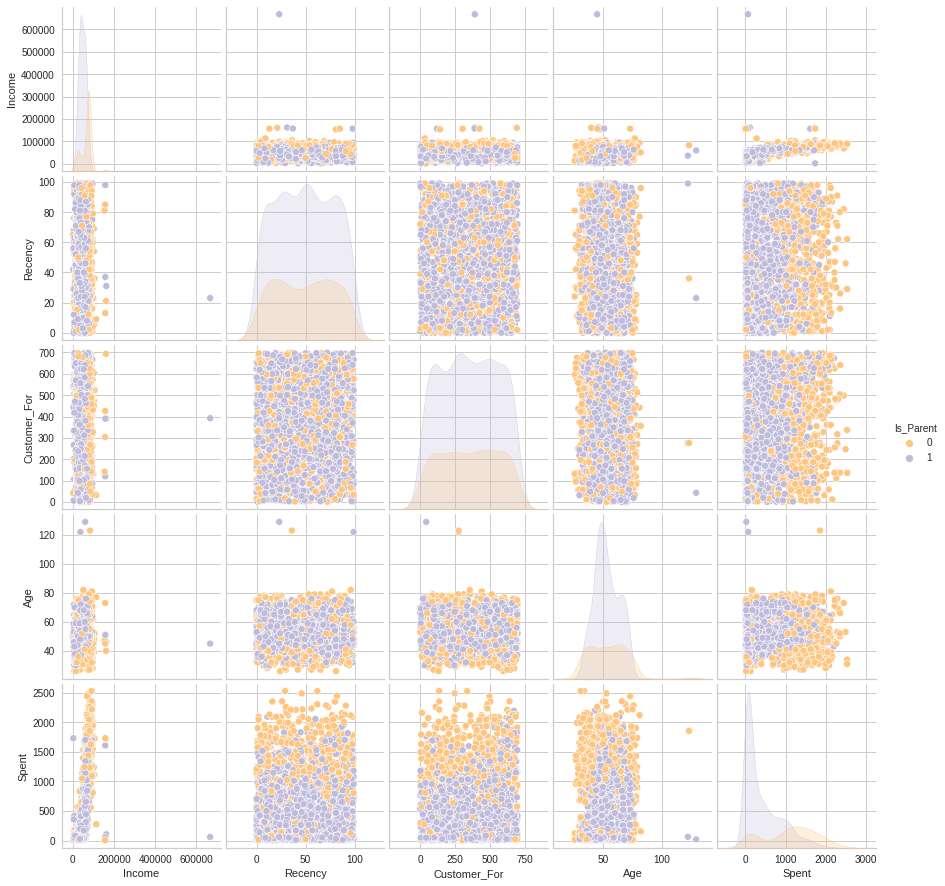

In [ ]:
# Group the data based on whether there are children and draw a scatter plot matrix
pairplot = dataset.loc[:, [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]]

sns.pairplot(pairplot, hue='Is_Parent', palette='PuOr')

Terlihat jelas ada outlier pada data "Age" dan "Income". Untuk memastikan, akan coba di cek jumlahnya, jika memang outlier maka datanya akan dihapus.

In [ ]:
print("Customer berusia lebih dari 100 = ", len(dataset[dataset["Age"]>100]))
print("Customers dengan income diatas 300,000 = ", len(dataset[dataset["Income"]>300000]))

Customer berusia lebih dari 100 =  3
Customers dengan income diatas 300,000 =  1


In [ ]:
#Hapus outliers
dataset = dataset[(dataset["Age"]<90)]
dataset = dataset[(dataset["Income"]<600000)]
print("Total data setelah outlier dihapus:", len(dataset))

Total data setelah outlier dihapus: 2212


# CORRELATION MATRIX

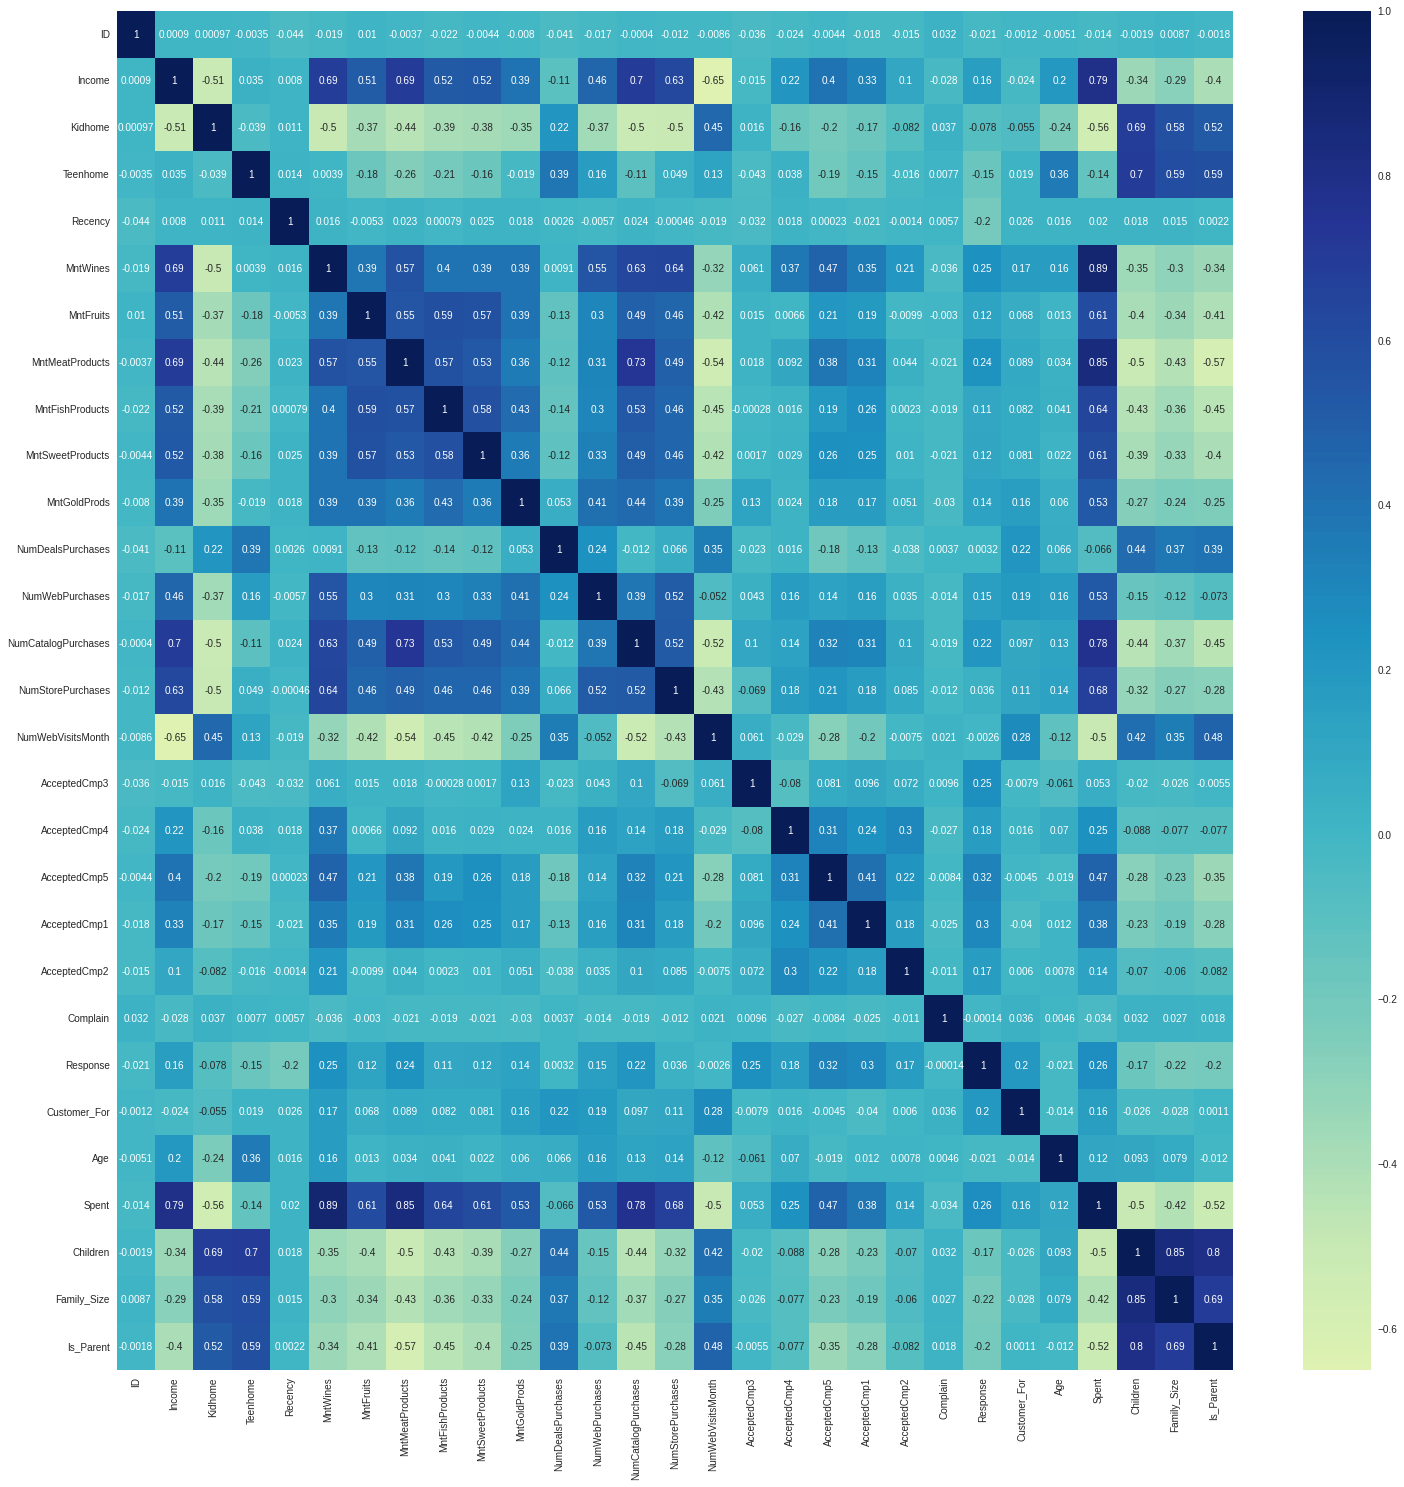

In [ ]:
#correlation matrix
corrmat= dataset.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat,annot=True, cmap='YlGnBu', center=0)

# DATA PREPROCESSING

In [ ]:
#Dapatkan daftar categorical features
x = (dataset.dtypes == 'object')
categorical_features = list(x[x].index)

print(categorical_features)

['Education', 'Marital_Status', 'Living_With']


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Beri label encoding
encoder = LabelEncoder()
for i in categorical_features:
    dataset[i]=dataset[[i]].apply(encoder.fit_transform)

In [ ]:
#Buat subset dataframe dengan menghapus fitur terkait penawaran yang diterima dan promosi
ds_copy = dataset.copy()
delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds_copy = ds_copy.drop(delete, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Normalisasikan fitur menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(ds_copy)
scaled_ds = pd.DataFrame(scaler.transform(ds_copy),columns= ds_copy.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Gunakan scaled data untuk mengurangi dimensi
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.018837,-0.893586,0.254760,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-1.050626,-0.893586,0.254760,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.444797,-0.893586,1.183144,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,0.183824,-0.893586,1.183144,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,-0.080437,0.571657,-0.673624,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# DIMENSIONALITY REDUCTION
= Proses mengurangi jumlah variabel acak dengan pertimbangan, dengan memperoleh satu set variabel utama.

</br>

Pada bagian ini akan dilakukan dimensionality reduction menjadi 3 fitur menggunakan Principal Component Analysis (PCA). PCA adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [ ]:
from sklearn.decomposition import PCA

#Dimensionality reduction menjadi 3 fitur dengan PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
Reduce_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["Fitur1","Fitur2", "Fitur3"]))
Reduce_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Fitur1,2212.0,-1.284887e-17,2.878667,-5.985703,-2.536871,-0.781454,2.383164,7.448521
Fitur2,2212.0,-3.854662e-17,1.709675,-4.204117,-1.330063,-0.164826,1.222850,6.180383
Fitur3,2212.0,3.774357e-17,1.235366,-3.833725,-0.884686,-0.050165,0.857732,6.568549


# CLUSTERING

Akan dilakukan pengelompokan menggunakan 3 metode clustering yang berbeda yaitu:

*   K-Means Clustering (gunakan metode Elbow untuk mencari jumlah cluster yang akan dibentuk
*   Agglomerative Clustering (gunakan dendrogram untuk mencari jumlah cluster yang akan dibentuk)
*   DBSCAN (gunakan nilai radius/epsilon dan MinPoints yang berbeda)

## K-Means Clustering

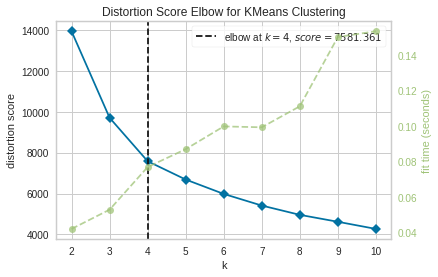

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Gunakan Elbow Method untuk mencari jumlah cluster
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(Reduce_ds)
Elbow.show()

Dari gambar di atas, dapat dilihat bahwa untuk data ini, cluster terbaik yang terbentuk adalah 4 cluster

In [ ]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(Reduce_ds)

for i in range(4):
    print('Cluster', i, ':', len(y_km[y_km==i]))

Cluster 0 : 536
Cluster 1 : 507
Cluster 2 : 557
Cluster 3 : 612


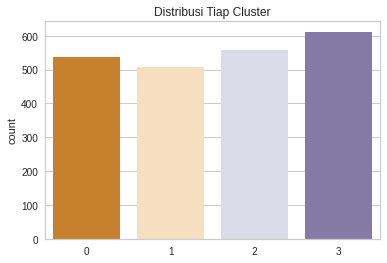

In [ ]:
pl = sns.countplot(x=y_km, palette= "PuOr")
pl.set_title("Distribusi Tiap Cluster")
plt.show()

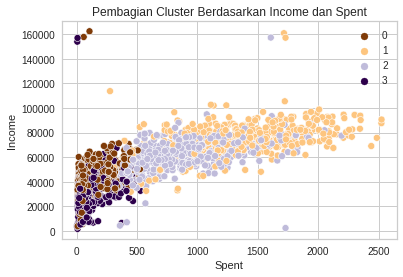

In [ ]:
pl = sns.scatterplot(data = dataset,x=dataset["Spent"], y=dataset["Income"],hue=y_km, palette= "PuOr")
pl.set_title("Pembagian Cluster Berdasarkan Income dan Spent")
plt.legend()
plt.show()

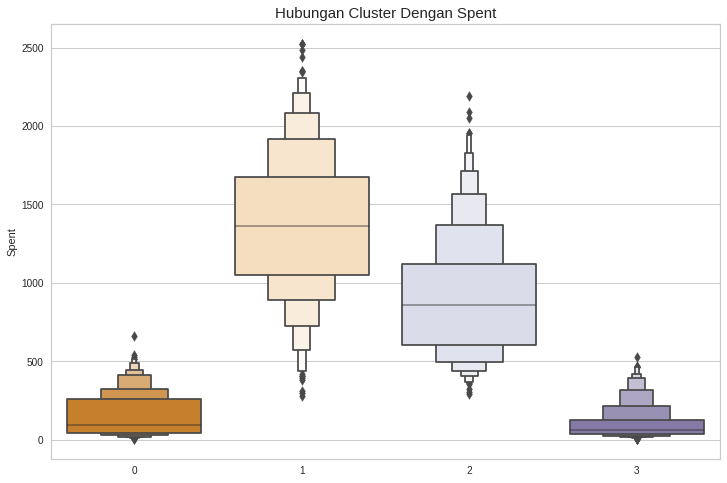

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=y_km, y=dataset["Spent"], palette="PuOr")
plt.title("Hubungan Cluster Dengan Spent", size=15)
plt.show()

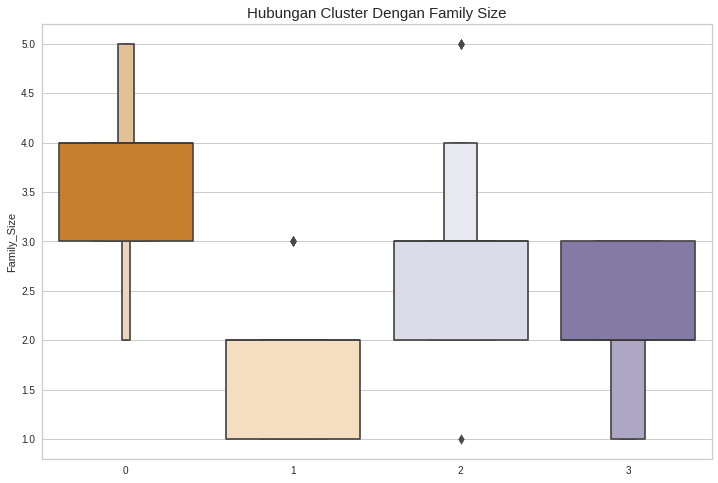

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=y_km, y=dataset["Family_Size"], palette="PuOr")
plt.title("Hubungan Cluster Dengan Family Size", size=15)
plt.show()

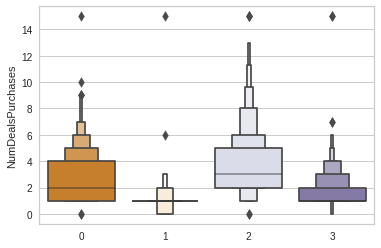

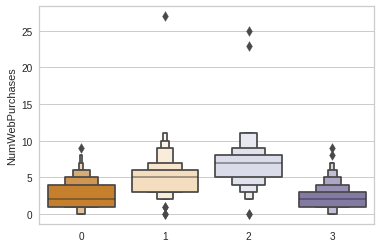

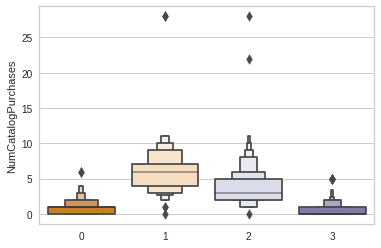

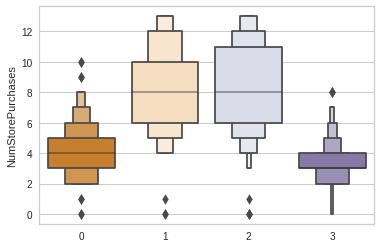

In [ ]:
Purchase = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases", "NumStorePurchases"]

for i in Purchase:
    plt.figure()
    sns.boxenplot(x=y_km, y=dataset[i], palette="PuOr")
    plt.show()

Dengan KMeans, dapat dilihat bahwa:

Cluster 0: pengeluaran rendah & income sedang

Cluster 1: pengeluaran tinggi & income tinggi

Cluster 2: pengeluaran tinggi & income sedang

Cluster 3: pengeluaran rendah & income rendah

## Agglomerative Clustering

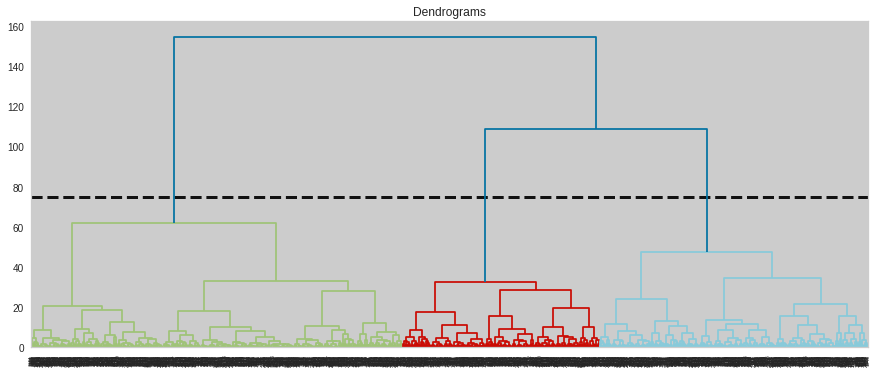

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,6))
plt.title("Dendrograms")
plt.hlines(y=75,xmin=0,xmax=25000,lw=3,linestyles='--')
dend = shc.dendrogram(shc.linkage(Reduce_ds, method='ward'))

Pada dendrogram, tinggi garis vertikal menunjukkan perbedaan antara tiap branch / cluster. Semakin panjang perbedaannya, maka semakin besar perbedaan pada cluster.

In [ ]:
#Setelah mendapatkan cluster dengan dendrogram, predict dengan Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_AC = AC.fit_predict(Reduce_ds)

for i in range(4):
    print('Cluster', i, ':', len(y_AC[y_AC==i]))

Cluster 0 : 619
Cluster 1 : 584
Cluster 2 : 507
Cluster 3 : 502


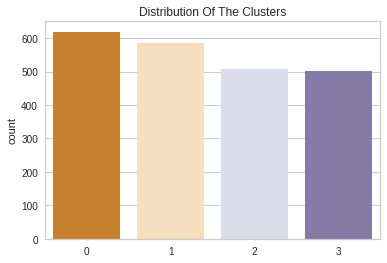

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=y_AC, palette= "PuOr")
pl.set_title("Distribusi Tiap Cluster")
plt.show()

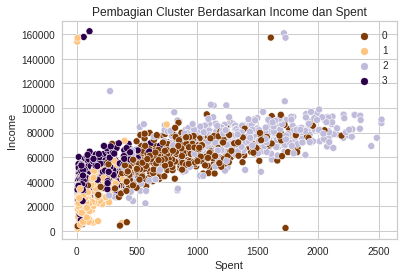

In [ ]:
pl = sns.scatterplot(data = dataset,x=dataset["Spent"], y=dataset["Income"],hue=y_AC, palette= "PuOr")
pl.set_title("Pembagian Cluster Berdasarkan Income dan Spent")
plt.legend()
plt.show()

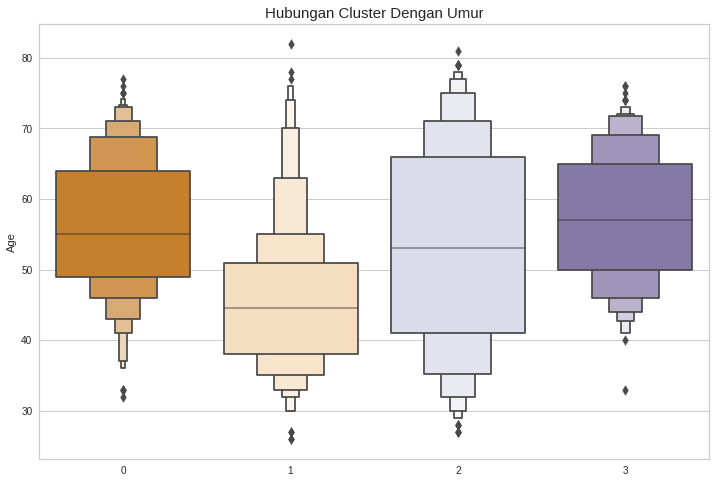

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=y_AC, y=dataset["Age"], palette="PuOr")
plt.title("Hubungan Cluster Dengan Umur", size=15)
plt.show()

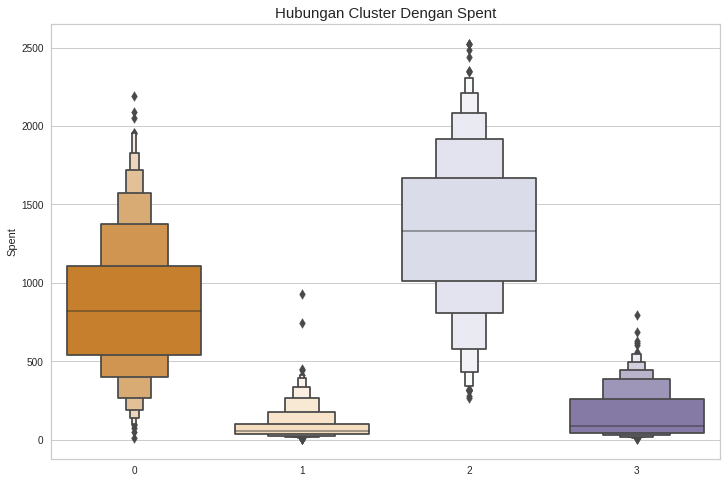

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=y_AC, y=dataset["Spent"], palette="PuOr")
plt.title("Hubungan Cluster Dengan Spent", size=15)
plt.show()

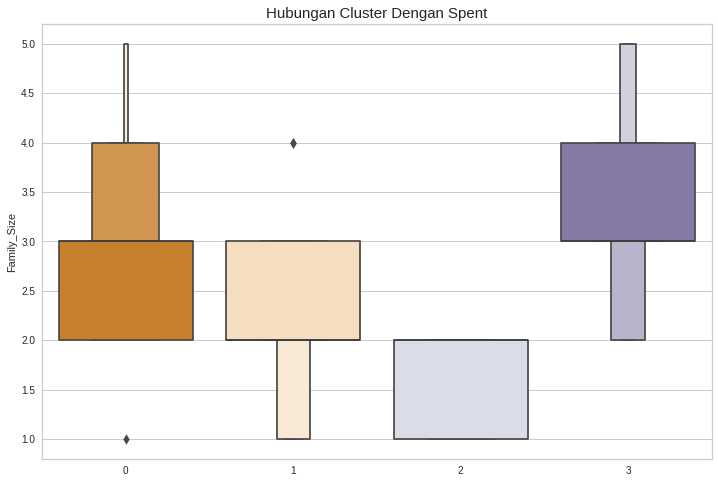

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=y_AC, y=dataset["Family_Size"], palette="PuOr")
plt.title("Hubungan Cluster Dengan Family_Size", size=15)
plt.show()

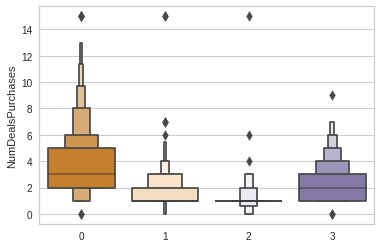

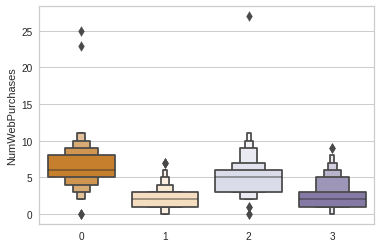

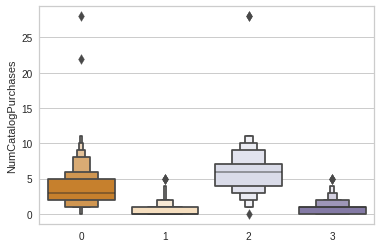

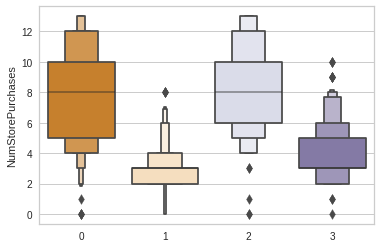

In [ ]:
Purchase = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases", "NumStorePurchases"]

for i in Purchase:
    plt.figure()
    sns.boxenplot(x=y_AC, y=dataset[i], palette="PuOr")
    plt.show()

Dengan Agglomerative Clustering, dapat dilihat bahwa:

Cluster 0: pengeluaran tinggi & income sedang

Cluster 1: pengeluaran rendah & income rendah

Cluster 2: pengeluaran tinggi & income tinggi

Cluster 3: pengeluaran rendah & income sedang